# Model training 
First iteration of model training 

Packages 

In [185]:
import os
#Change current directory
os.chdir ('/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn')
#Check the current directory
os.getcwd()

'/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn'

In [186]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from src.components.data_structuring import gamme_encoding 
from src.eda import utils
from src.eda.utils import columnsFamilies

In [187]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

In [188]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [189]:
#Loading data
data_date = "2024-10-17"
x_train = pd.read_csv(f"{data_path}/{data_date}_x_train.csv", index_col = 0)
x_dev = pd.read_csv(f"{data_path}/{data_date}_x_dev.csv", index_col = 0)
x_test = pd.read_csv(f"{data_path}/{data_date}_x_test.csv", index_col = 0)
y_train = pd.read_csv(f"{data_path}/{data_date}_y_train.csv", index_col = 0)
y_dev = pd.read_csv(f"{data_path}/{data_date}_y_dev.csv", index_col = 0)
y_test = pd.read_csv(f"{data_path}/{data_date}_y_test.csv", index_col = 0)

print (f"x_train shape : {x_train.shape}")
print (f"x_dev shape : {x_dev.shape}")
print (f"x_test shape : {x_test.shape}")
print (f"y_train shape : {y_train.shape}")
print (f"y_dev shape : {y_dev.shape}")
print (f"y_test shape : {y_test.shape}")

x_train shape : (86992, 531)
x_dev shape : (14563, 531)
x_test shape : (5839, 531)
y_train shape : (86992, 1)
y_dev shape : (14563, 1)
y_test shape : (5839, 1)


In [190]:
#target value_counts
print ("y_train")
print (y_train.value_counts())
print ("-------------")
print ("y_dev")
print (y_dev.value_counts())
print ("-------------")
print ("y_test")
print (y_test.value_counts())

y_train
churn
1        43700
0        43292
dtype: int64
-------------
y_dev
churn
1        7325
0        7238
dtype: int64
-------------
y_test
churn
1        2938
0        2901
dtype: int64


-------------------

### Extracting feature importance 

In [191]:
#columns families
columns_families = columnsFamilies(x_train).get_columns_families()

In [141]:
RANDOM_FOREST_MODEL =  RandomForestClassifier(n_estimators = 10, max_depth=12).fit(x_train, y_train)
#Quick test
print ("Quick test")
y_train_predicted = RANDOM_FOREST_MODEL.predict(x_train)
y_test_predicted = RANDOM_FOREST_MODEL.predict(x_test)
print(f"f1 score train: {f1_score(y_train, y_train_predicted)}") 
print(f"precision score test: {precision_score(y_test, y_test_predicted)}") 
print(f"recall score test: {recall_score(y_test, y_test_predicted)}") 
print(f"f1 score test: {f1_score(y_test, y_test_predicted)}") 

/opt/cloudera/parcels/Anaconda-2019.10/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Quick test
f1 score train: 0.8736249058986377
precision score test: 0.9001161440185831
recall score test: 0.7913546630360789
f1 score test: 0.8422387248686832


In [ ]:
#Extract importances from model
importance = RANDOM_FOREST_MODEL.feature_importances_
#Plot feature importance
utils.vis_feature_importance(x_train.columns, importance, columns_families)

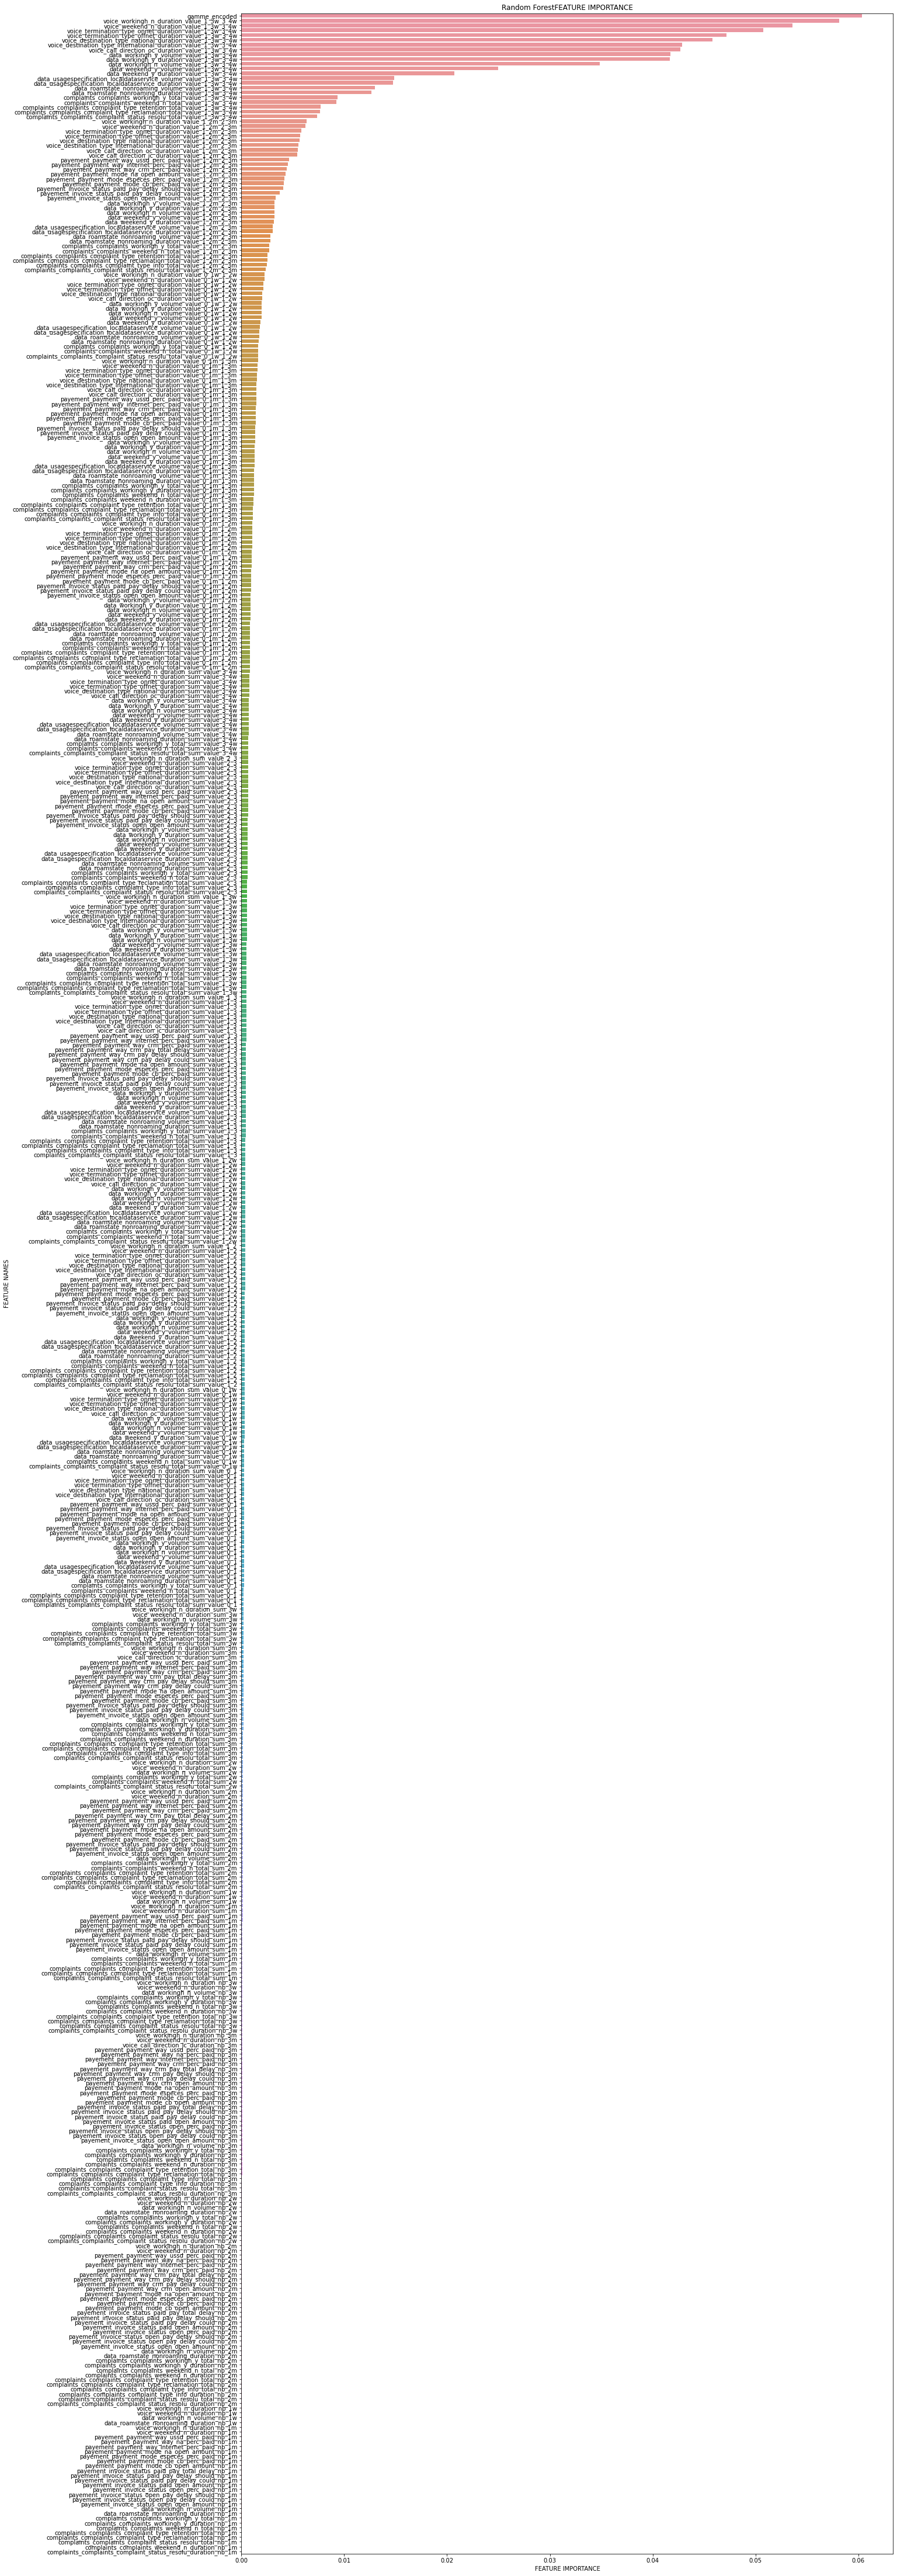

In [169]:
utils.plot_feature_importance(importance, x_train.columns, "Random Forest")

#### Try feature importance without the gamme_encoded 

In [199]:
x_train_no_gamme = x_train[[column for column in x_train.columns if column not in ["gamme_encoded"]]]
x_dev_no_gamme = x_dev[[column for column in x_dev.columns if column not in ["gamme_encoded"]]]
x_test_no_gamme = x_test[[column for column in x_test.columns if column not in ["gamme_encoded"]]]
try :
    x_train_no_gamme["gamme_encoded"].head()
except :
    print ("gamme_encoded doesnt exist in new data")

gamme_encoded doesnt exist in new data


In [200]:
RANDOM_FOREST_MODEL =  RandomForestClassifier(n_estimators = 10, max_depth=12).fit(x_train_no_gamme, y_train)
#Quick test
print ("Quick test")
y_train_predicted = RANDOM_FOREST_MODEL.predict(x_train_no_gamme)
y_test_predicted = RANDOM_FOREST_MODEL.predict(x_test_no_gamme)
print(f"f1 score train: {f1_score(y_train, y_train_predicted)}") 
print(f"precision score test: {precision_score(y_test, y_test_predicted)}") 
print(f"recall score test: {recall_score(y_test, y_test_predicted)}") 
print(f"f1 score test: {f1_score(y_test, y_test_predicted)}") 

/opt/cloudera/parcels/Anaconda-2019.10/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Quick test
f1 score train: 0.8775544794188862
precision score test: 0.902826171118854
recall score test: 0.7937372362151123
f1 score test: 0.8447744973736641


In [204]:
#Extract feature importances
new_importance = RANDOM_FOREST_MODEL.feature_importances_

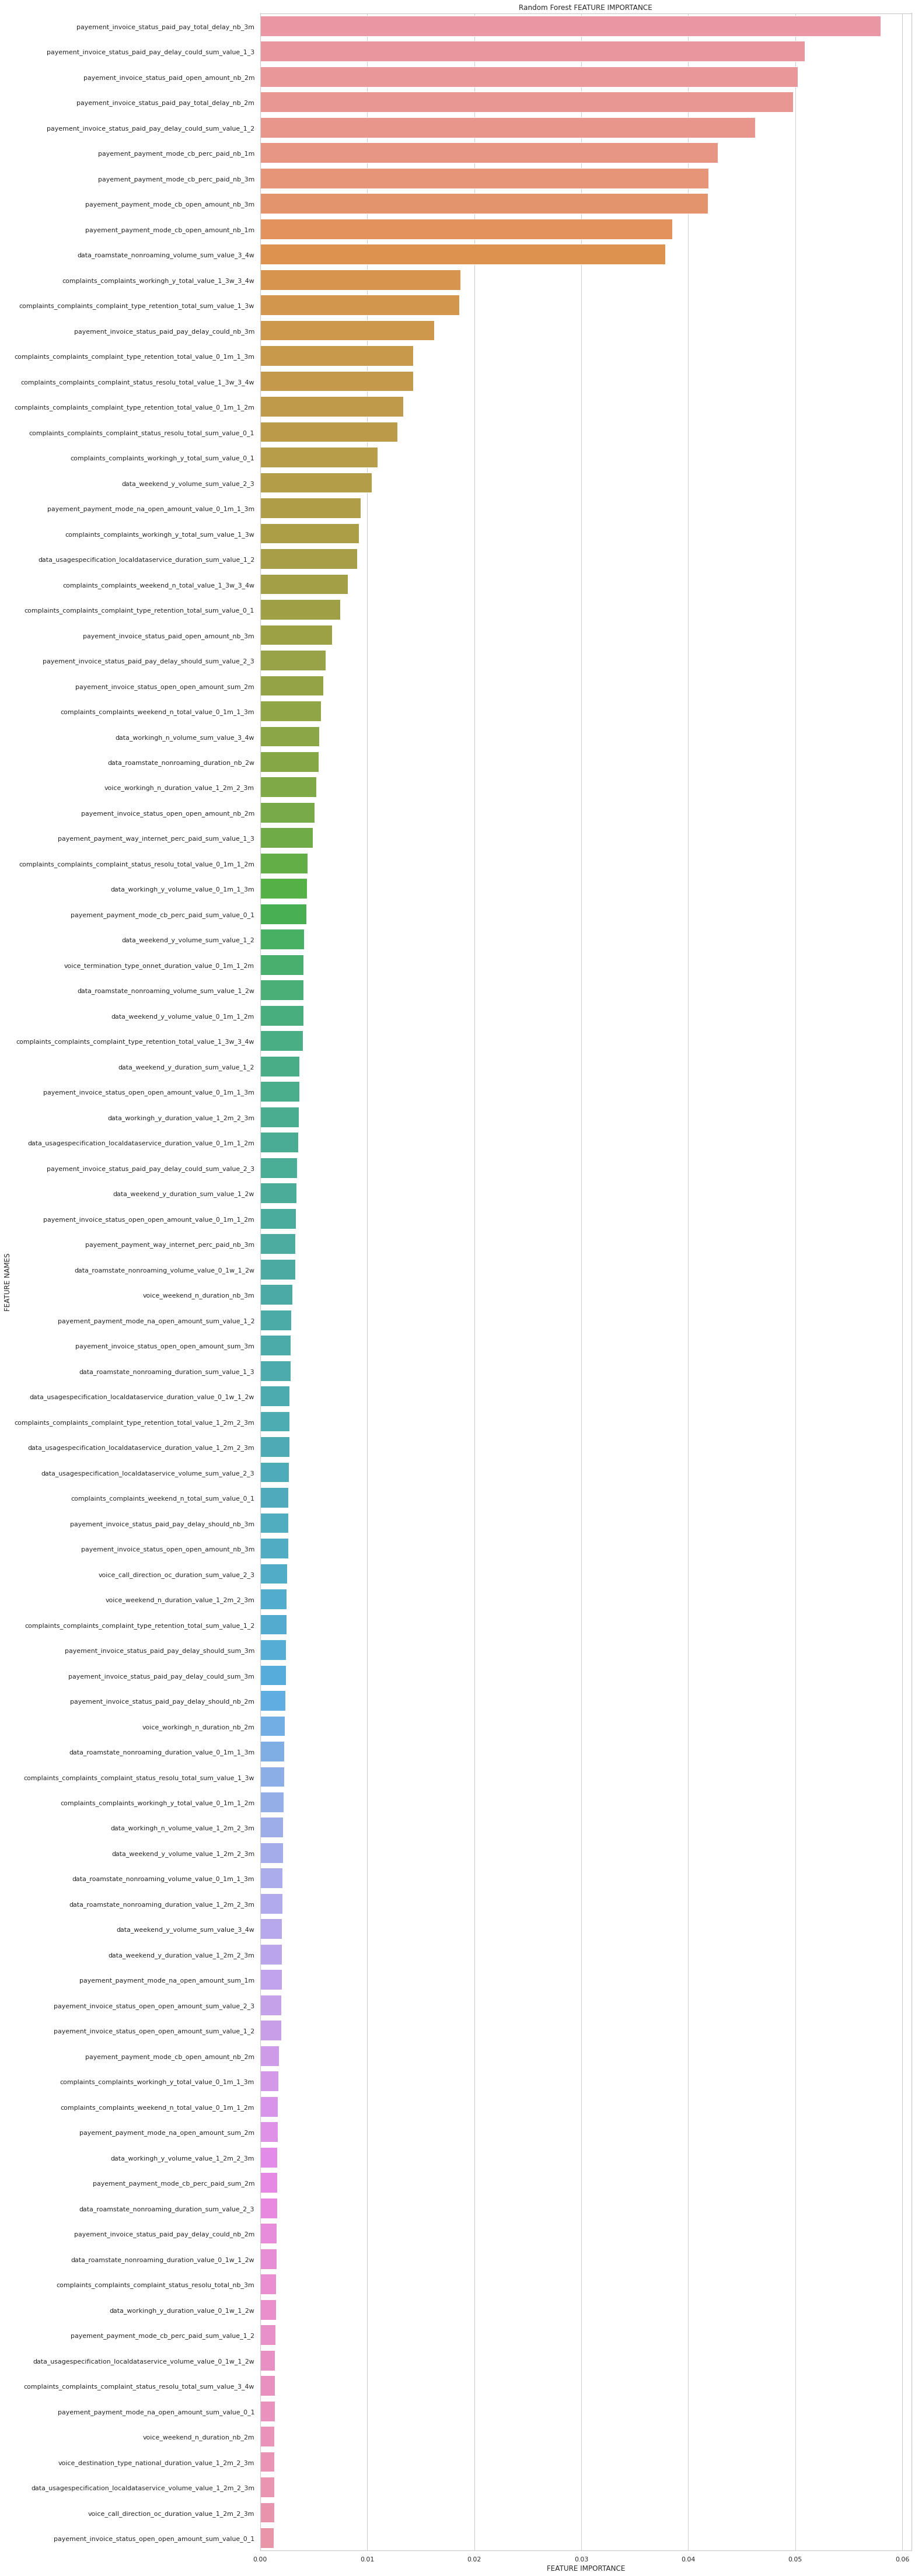

In [218]:
utils.plot_feature_importance(new_importance, x_train_no_gamme.columns, "Random Forest ", 100)